Student name: EmiL Hellberg<br>
Student number: 1901299 <br>
January, 27th, 2025  <br>

# Exercise 1 | TKO_7092 Evaluation of Machine Learning Methods 2025

##### Prediction of the metal ion content from multi-parameter data
<b> Use K-Nearest Neighbor Regression with euclidean distance to predict total metal concentration (c_total), concentration of Cadmium (Cd) and concentration of Lead (Pb), using number of neighbors k = 1, 3, 5, 7.</b>

    - You may use Nearest Neighbor Regression from https://scikit-learn.org/stable/modules/neighbors.html   
    - Implement Leave-One-Out cross-validation and calculate the C-index for each output (c_total, Cd, Pb). 
    - Implement Leave-Replicas-Out cross-validation and calculate the C-index for each output (c_total, Cd, Pb).
    - Return your solution as a Jupyter Notebook .ipynb notebook and as a PDF-file made from it. Please, add your full name to the file name.
    - The exercise will be graded by a maximum of 2 points.
    - Submit to moodle your solution on ** Wednesday 5 of February ** at the latest.
  
<b>Please be aware that you are required to submit your individual solution.<br> 
Submissions with identical or similar code will result in a failure for the exercise.</b>

## Import libraries

In [181]:
# In this cell import all libraries you need. For example: 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import somersd
from sklearn.neighbors import KNeighborsRegressor

## Read and visualize the dataset

<p> <b>Note:</b> This dataset differs slightly from the one used in the video lectures. <br>
<b>In this dataset, some mixtures have 3 replicas, while others have 4 replicas. </b> </p> 

In the following cell: 
- Read the file water_data.csv
- Print the dimesions of the dataset (i.e. number of rows and columns) and display the first 5 rows.
- Identify the inputs and the outputs columns.
- Provide the number of mixtures with 3 replicas and 4 replicas, respectively.

In [34]:
data = pd.read_csv('./water_data.csv')
print(data.shape)
print(data.head())

replicas_outputs_2 = data[data.duplicated(['c_total', 'Cd', 'Pb'])]
print(replicas_outputs_2.to_string())

replicas_outputs_3 = replicas_outputs_2[replicas_outputs_2.duplicated(['c_total', 'Cd', 'Pb'])]
print(replicas_outputs_3.to_string())
print(replicas_outputs_3.shape)

replicas_outputs_4 = replicas_outputs_3[replicas_outputs_3.duplicated(['c_total', 'Cd', 'Pb'])]
print(replicas_outputs_4.to_string())
print(replicas_outputs_4.shape)

(225, 6)
   c_total   Cd    Pb      Mod1      Mod2      Mod3
0      0.0  0.0   0.0 -0.999216 -0.714208 -0.414911
1      0.0  0.0   0.0 -0.990800 -0.714373 -0.238335
2      0.0  0.0   0.0 -0.990539 -0.714125  0.020788
3     14.0  0.0  14.0 -1.001247 -0.713546  0.945465
4     14.0  0.0  14.0 -1.013727 -0.714125  0.569631
     c_total      Cd      Pb      Mod1      Mod2      Mod3
1        0.0     0.0     0.0 -0.990800 -0.714373 -0.238335
2        0.0     0.0     0.0 -0.990539 -0.714125  0.020788
4       14.0     0.0    14.0 -1.013727 -0.714125  0.569631
5       14.0     0.0    14.0 -0.998816 -0.713629  0.691867
7       14.0     2.8    11.2 -1.013046 -0.713298  0.276062
8       14.0     2.8    11.2 -1.015348 -0.715034  0.450498
10      14.0     5.6     8.4 -0.994542 -0.715696 -0.030300
11      14.0     5.6     8.4 -0.988768 -0.714208  0.792201
13      14.0     8.4     5.6 -0.910860 -0.714290  0.389355
14      14.0     8.4     5.6 -0.909058 -0.714125  0.858455
16      14.0    11.2     2.8 -

## C-index code 

In [74]:
# In this cell is the fuction that computes the c-index value based on Somers'D statistic.
# Use this fuction as the evaluation metric in the Leave-One-Out (LOOCV) and Leave-Replicas-Out (LROCV) cross-validation methods.

def cindex(true, pred):
    s_d = somersd(true, y=pred, alternative='two-sided')
    c_index = (s_d.statistic + 1.0)/2.0
    return c_index

## Functions

In [199]:
# In this cell add the functions that you need for the data analysis part.

y_total = data['c_total']
y_cadmium = data['Cd']
y_lead = data['Pb']
x = data[data.columns[3:6]]

def leave_one_out():
    k_values = [1, 3, 5, 7]
    leave_one_out_results = pd.DataFrame(columns = ['k', 'c-index', 'Label'])

    for k in k_values:
        knn_regressor_c_total = KNeighborsRegressor(n_neighbors = k)
        knn_regressor_Cd = KNeighborsRegressor(n_neighbors = k)
        knn_regressor_Pd = KNeighborsRegressor(n_neighbors = k)

        total_y_predict = []
        total_y_true = []
        
        cadmium_y_predict = []
        cadmium_y_true = []
        
        lead_y_predict = []
        lead_y_true = []

        for n in range(0, 224):
            y_total_test = y_total.iloc[[n]]
            y_cadmium_test = y_cadmium.iloc[[n]]
            y_lead_test = y_lead.iloc[[n]]
            x_test = x.iloc[[n]]

            y_total_train = y_total.drop(n)
            y_cadmium_train = y_cadmium.drop(n)
            y_lead_train = y_lead.drop(n)
            x_train = x.drop(n)

            knn_regressor_c_total.fit(x_train, y_total_train)
            knn_regressor_Cd.fit(x_train, y_cadmium_train)
            knn_regressor_Pd.fit(x_train, y_lead_train)

            total_predict = knn_regressor_c_total.predict(x_test)
            cadmium_predict = knn_regressor_Cd.predict(x_test)
            lead_predict = knn_regressor_Pd.predict(x_test)

            total_y_predict.append(total_predict[0])
            total_y_true.append(y_total_test.item())

            cadmium_y_predict.append(cadmium_predict[0])
            cadmium_y_true.append(y_cadmium_test.item())

            lead_y_predict.append(lead_predict[0])
            lead_y_true.append(y_lead_test.item())

        c_index_total = cindex(total_y_true, total_y_predict)
        cadmium_c = cindex(cadmium_y_true, cadmium_y_predict)
        lead_c = cindex(lead_y_true, lead_y_predict)

        print("C-index for total metal concentration regression with k value =", k, " is:", c_index_total)
        print("C-index for cadmium content regression with k value =", k, " is: ", cadmium_c)
        print("C-index for lead content regression with k value =", k, " is: ", lead_c)

        c_index_result = pd.DataFrame({'k': [k], 'c-index': [c_index_total], 'Label': ['Total metal concentration']})
        leave_one_out_results = pd.concat([leave_one_out_results, c_index_result], ignore_index = True)

        cadmium_result = pd.DataFrame({'k': [k], 'c-index': [cadmium_c], 'Label': ['Cd concentration']})
        leave_one_out_results = pd.concat([leave_one_out_results, cadmium_result], ignore_index = True)

        lead_result = pd.DataFrame({'k': [k], 'c-index': [lead_c], 'Label': ['Pb concentration']})
        leave_one_out_results = pd.concat([leave_one_out_results, lead_result], ignore_index = True)
        print(leave_one_out_results.to_string())
    
    return leave_one_out_results

def leave_replicas_out():
    k_values = [1, 3, 5, 7]
    leave_replicas_out_results = pd.DataFrame(columns = ['k', 'c-index', 'Label'])

    for k in k_values:
        c_index_total = 0
        cadmium_c = 0
        lead_c = 0
        
        replicas_4_index = replicas_outputs_4.index
        replicas_3_index = data.drop(replicas_outputs_2.index).drop(replicas_4_index.map(lambda x: x + 1)).index
        
        knn_regressor_c_total = KNeighborsRegressor(n_neighbors = k)
        knn_regressor_Cd = KNeighborsRegressor(n_neighbors = k)
        knn_regressor_Pd = KNeighborsRegressor(n_neighbors = k)

        for i in range(0, 3):
            x_test = pd.concat([x.loc[replicas_3_index], x.loc[replicas_4_index]])
            y_total_test = pd.concat([y_total.loc[replicas_3_index], y_total.loc[replicas_4_index]])
            y_cadmium_test = pd.concat([y_cadmium.loc[replicas_3_index], y_cadmium.loc[replicas_4_index]])
            y_lead_test = pd.concat([y_lead.loc[replicas_3_index], y_lead.loc[replicas_4_index]])

            training_index = data.index.drop(replicas_3_index).drop(replicas_4_index)

            x_train = x.loc[training_index]
            y_total_train = y_total.loc[training_index]
            y_cadmium_train = y_cadmium.loc[training_index]
            y_lead_train = y_lead.loc[training_index]

            knn_regressor_c_total.fit(x_train, y_total_train)
            knn_regressor_Cd.fit(x_train, y_cadmium_train)
            knn_regressor_Pd.fit(x_train, y_lead_train)

            total_predict = knn_regressor_c_total.predict(x_test)
            cadmium_predict = knn_regressor_Cd.predict(x_test)
            lead_predict = knn_regressor_Pd.predict(x_test)

            c_index_total = cindex(y_total_test, total_predict) + c_index_total
            cadmium_c = cindex(y_cadmium_test, cadmium_predict) + cadmium_c
            lead_c = cindex(y_lead_test, lead_predict) + lead_c
            
            replicas_3_index = replicas_3_index.map(lambda x: x + 1)
            replicas_4_index = replicas_4_index.map(lambda x: x + 1)

        c_index_total = c_index_total / 3
        cadmium_c = cadmium_c / 3
        lead_c = lead_c / 3

        print("C-index for total metal concentration regression with k value =", k, " is:", c_index_total)
        print("C-index for cadmium content regression with k value =", k, " is: ", cadmium_c)
        print("C-index for lead content regression with k value =", k, " is: ", lead_c)

        c_index_result = pd.DataFrame({'k': [k], 'c-index': [c_index_total], 'Label': ['Total metal concentration']})
        leave_replicas_out_results = pd.concat([leave_replicas_out_results, c_index_result], ignore_index = True)

        cadmium_result = pd.DataFrame({'k': [k], 'c-index': [cadmium_c], 'Label': ['Cd concentration']})
        leave_replicas_out_results = pd.concat([leave_replicas_out_results, cadmium_result], ignore_index = True)

        lead_result = pd.DataFrame({'k': [k], 'c-index': [lead_c], 'Label': ['Pb concentration']})
        leave_replicas_out_results = pd.concat([leave_replicas_out_results, lead_result], ignore_index = True)
        print(leave_replicas_out_results.to_string())

    return leave_replicas_out_results

## Results for Leave-One-Out cross-validation

In [180]:
# Here run your script for Leave-One-Out cross-validation and print the corresponding results.

leave_one_out()

C-index for total metal concentration regression with k value = 1  is: 0.9075169844400613
C-index for cadmium content regression with k value = 1  is:  0.9212012644889358
C-index for lead content regression with k value = 1  is:  0.8799974749600201
   k   c-index                      Label
0  1  0.907517  Total metal concentration
1  1  0.907517           Cd concentration
2  1  0.907517           Pb concentration


C:\Users\emilh\AppData\Local\Temp\ipykernel_8136\3291339657.py:65: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  leave_one_out_results = pd.concat([leave_one_out_results, c_index_result], ignore_index = True)


C-index for total metal concentration regression with k value = 3  is: 0.9140696909927679
C-index for cadmium content regression with k value = 3  is:  0.899072708113804
C-index for lead content regression with k value = 3  is:  0.8755365709957075
   k   c-index                      Label
0  1  0.907517  Total metal concentration
1  1  0.907517           Cd concentration
2  1  0.907517           Pb concentration
3  3  0.914070  Total metal concentration
4  3  0.914070           Cd concentration
5  3  0.914070           Pb concentration
C-index for total metal concentration regression with k value = 5  is: 0.8932281393819855
C-index for cadmium content regression with k value = 5  is:  0.8610115911485774
C-index for lead content regression with k value = 5  is:  0.8549995791600034
   k   c-index                      Label
0  1  0.907517  Total metal concentration
1  1  0.907517           Cd concentration
2  1  0.907517           Pb concentration
3  3  0.914070  Total metal concentration

## Results for Leave-Replicas-Out cross-validation

In [167]:
# Here run your script for Leave-Replicas-Out cross-validation and print the corresponding results.

leave_replicas_out()

C-index for total metal concentration regression with k value = 1  is: 0.9164884510377057
C-index for cadmium content regression with k value = 1  is:  0.9261613308223478
C-index for lead content regression with k value = 1  is:  0.8879259797412077
C-index for total metal concentration regression with k value = 3  is: 0.9288738397461483
C-index for cadmium content regression with k value = 3  is:  0.901208411801632
C-index for lead content regression with k value = 3  is:  0.8792934319631431
C-index for total metal concentration regression with k value = 5  is: 0.8993793523212248
C-index for cadmium content regression with k value = 5  is:  0.849654739485248
C-index for lead content regression with k value = 5  is:  0.8482150698164576
C-index for total metal concentration regression with k value = 7  is: 0.8923747292309482
C-index for cadmium content regression with k value = 7  is:  0.8177181418706843
C-index for lead content regression with k value = 7  is:  0.839190919765259


## Plot Leave-One-Out and Leave-Replicas-Out Results

Note: You may plot the results as they were presented in the video lecture (refer to MOOC2-Module 2 .pptx slides).

C-index for total metal concentration regression with k value = 1  is: 0.9075169844400613
C-index for cadmium content regression with k value = 1  is:  0.9212012644889358
C-index for lead content regression with k value = 1  is:  0.8799974749600201
   k   c-index                      Label
0  1  0.907517  Total metal concentration
1  1  0.921201           Cd concentration
2  1  0.879997           Pb concentration


C:\Users\emilh\AppData\Local\Temp\ipykernel_8136\1282850071.py:63: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  leave_one_out_results = pd.concat([leave_one_out_results, c_index_result], ignore_index = True)


C-index for total metal concentration regression with k value = 3  is: 0.9140696909927679
C-index for cadmium content regression with k value = 3  is:  0.899072708113804
C-index for lead content regression with k value = 3  is:  0.8755365709957075
   k   c-index                      Label
0  1  0.907517  Total metal concentration
1  1  0.921201           Cd concentration
2  1  0.879997           Pb concentration
3  3  0.914070  Total metal concentration
4  3  0.899073           Cd concentration
5  3  0.875537           Pb concentration
C-index for total metal concentration regression with k value = 5  is: 0.8932281393819855
C-index for cadmium content regression with k value = 5  is:  0.8610115911485774
C-index for lead content regression with k value = 5  is:  0.8549995791600034
   k   c-index                      Label
0  1  0.907517  Total metal concentration
1  1  0.921201           Cd concentration
2  1  0.879997           Pb concentration
3  3  0.914070  Total metal concentration

C:\Users\emilh\AppData\Local\Temp\ipykernel_8136\1282850071.py:127: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  leave_replicas_out_results = pd.concat([leave_replicas_out_results, c_index_result], ignore_index = True)


C-index for total metal concentration regression with k value = 7  is: 0.8923747292309482
C-index for cadmium content regression with k value = 7  is:  0.8177181418706843
C-index for lead content regression with k value = 7  is:  0.839190919765259
    k   c-index                      Label
0   1  0.916488  Total metal concentration
1   1  0.926161           Cd concentration
2   1  0.887926           Pb concentration
3   3  0.928874  Total metal concentration
4   3  0.901208           Cd concentration
5   3  0.879293           Pb concentration
6   5  0.899379  Total metal concentration
7   5  0.849655           Cd concentration
8   5  0.848215           Pb concentration
9   7  0.892375  Total metal concentration
10  7  0.817718           Cd concentration
11  7  0.839191           Pb concentration


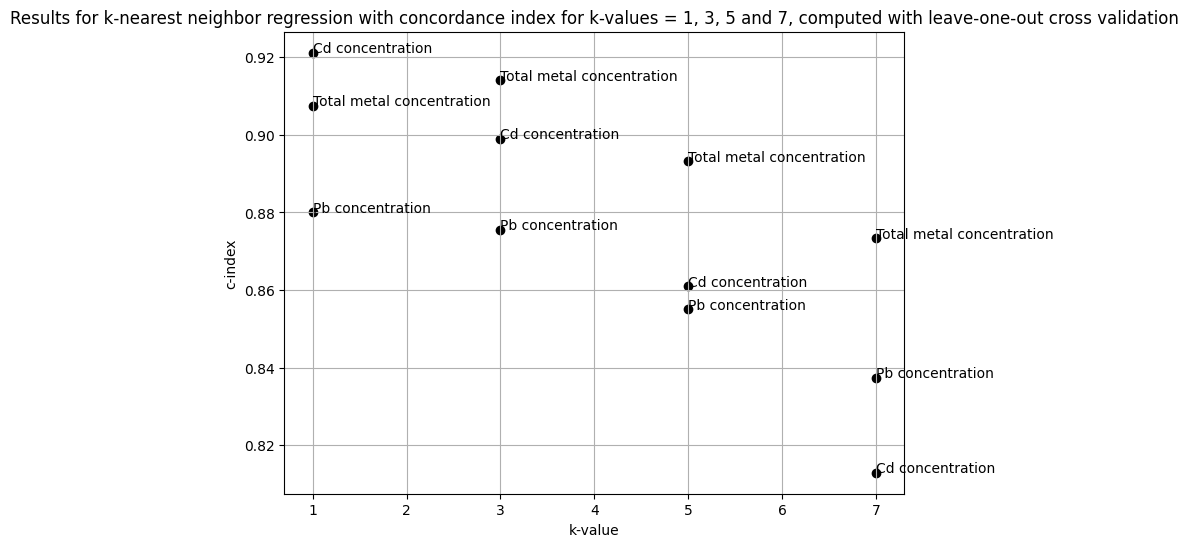

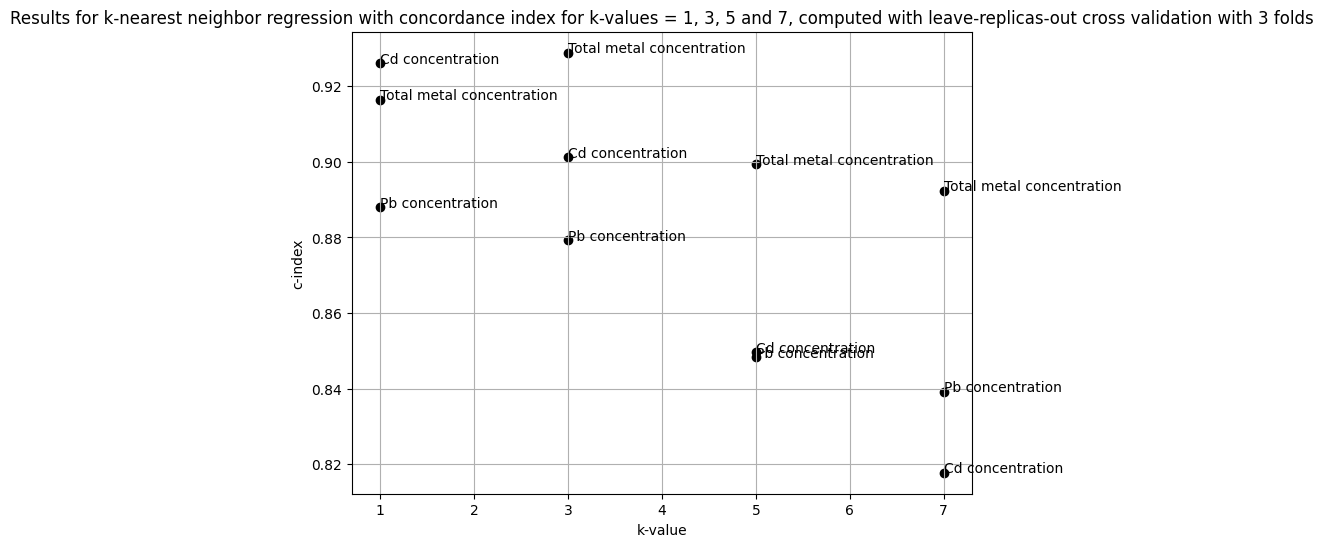

In [200]:
leave_one_out_results = leave_one_out()
leave_replicas_out_results = leave_replicas_out()

plt.figure(figsize = (8, 6))
plt.scatter(leave_one_out_results['k'], leave_one_out_results['c-index'], color = 'black')

for i in range(len(leave_one_out_results)):
    plt.text(leave_one_out_results['k'][i], leave_one_out_results['c-index'][i], leave_one_out_results['Label'][i], fontsize = 10)

plt.title("Results for k-nearest neighbor regression with concordance index for k-values = 1, 3, 5 and 7, computed with leave-one-out cross validation")
plt.xlabel("k-value")
plt.ylabel("c-index")
plt.grid(True)

plt.show()

plt.figure(figsize = (8, 6))
plt.scatter(leave_replicas_out_results['k'], leave_replicas_out_results['c-index'], color = 'black')

for i in range(len(leave_replicas_out_results)):
    plt.text(leave_replicas_out_results['k'][i], leave_replicas_out_results['c-index'][i], leave_replicas_out_results['Label'][i], fontsize = 10)

plt.title("Results for k-nearest neighbor regression with concordance index for k-values = 1, 3, 5 and 7, computed with leave-replicas-out cross validation with 3 folds")
plt.xlabel("k-value")
plt.ylabel("c-index")
plt.grid(True)

plt.show()

## Interpretation of results
#### Answer the following questions based on the results obtained
1. Which cross-validation approach produced more optimistic results, and why?
2. Which cross-validation method provides a better estimate of the model's performance on unseen mixtures? Explain your answer.

#### Answers: